<a href="https://colab.research.google.com/github/SORADATA/Python_for_Data_Analysis/blob/main/EmployeePerformanceipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des Relations entre Variables


Ce document explore différents techniques pour analyser les relations entre les variables qualitatives, quantitatives ou mixtes en python.Il inclut des explications théoriques,des conditions d'application et des hypothèses statistiques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Changed to pyplot
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Changed to pyplot
import seaborn as sns

# Corrected the file path. It should be enclosed in quotes or use raw string (r'path')


file_path = "https://raw.githubusercontent.com/SORADATA/Python_-for_Data-Science/refs/heads/main/EmployeePerformance/Extended_Employee_Performance_and_Productivity_Data.csv"
df = pd.read_csv(file_path)
print(df.head())

print(df["Department"].isnull().sum())  # Vérifie le nombre de valeurs manquantes dans la colonne Department
print(df["Employee_Satisfaction_Score"].isnull().sum())  # Vérifie le nombre de valeurs manquantes dans la colonne Employee_Satisfaction_Score
print(df["Department"].unique())  # Affiche les départements uniques dans la colonne


df = df.dropna(subset=["Department", "Employee_Satisfaction_Score"])
print(df["Department"].isnull().sum())  # Vérifie le nombre de valeurs manquantes dans la colonne Department
print(df["Employee_Satisfaction_Score"].isnull().sum())  # Vérifie le nombre de valeurs manquantes dans la colonne Employee_Satisfaction_Score
print(df["Department"].unique())  # Affiche les départements uniques dans la colonne


df = df.dropna(subset=["Department", "Employee_Satisfaction_Score"])



   Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                    Hire_Date  Years_At_Company Education_Level  \
0  2022-01-19 08:03:05.556036                 2     High School   
1  2024-04-18 08:03:05.556036                 0     High School   
2  2015-10-26 08:03:05.556036                 8     High School   
3  2016-10-22 08:03:05.556036                 7        Bachelor   
4  2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34               

Dans ce projet l'objectif est d'analyser les écarts de performance entre les départements en explorant les relations entre variables qualitatives(départements, satisfaction) et quatitatives (score de performance, heures travaillées).


# Analyse de la liaison entre deux variables qualitatives

**Le test de khi-deux (chi2)**  est une méthode statistique permettant de déterminer si eux variables qualitatives sont **indépendantes** ou non.

Conditions d'utilisation :



*   Les échantillons doivent etre **indépendantes**
*   Les effectifs attendus dans chaque case du tableau de contingence doivent etre **supérieurs à 5**

Hypothèses du Test :



*   **H0 (hypothèse nulle)** : les deux variables sont **indépendantes**.
*   **H1(hypothèse aternative**) : les deux variables sont **dépendantes**





In [ ]:
##############################################################################################################################################################################################
#                                                         Analyse des deux  variables qualitatives                                                                                            #
###############################################################################################################################################################################################

In [ ]:
# Afficher les deux variables qualitatives
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


**Le sexe et le niveau d'éducation influencent-ils la performance des employés ?**

In [ ]:
# Catégorisation de la performance (avant analyse)
bins = [0, 2, 3, 5]  # Définir des bornes pour les catégories (ex : faible, moyen, élevé)
labels = ['Faible', 'Moyenne', 'Haute']
df['Performance_Category'] = pd.cut(df['Performance_Score'], bins=bins, labels=labels)

#  Etape 1 : Description univariée
sexe_counts = df["Gender"].value_counts()
sexe_counts

,count
Gender,
Male,48031
Female,48001
Other,3968


In [ ]:
Education_Level_counts = df["Education_Level"].value_counts()
Education_Level_counts

,count
Education_Level,
Bachelor,50041
High School,30004
Master,14904
PhD,5051


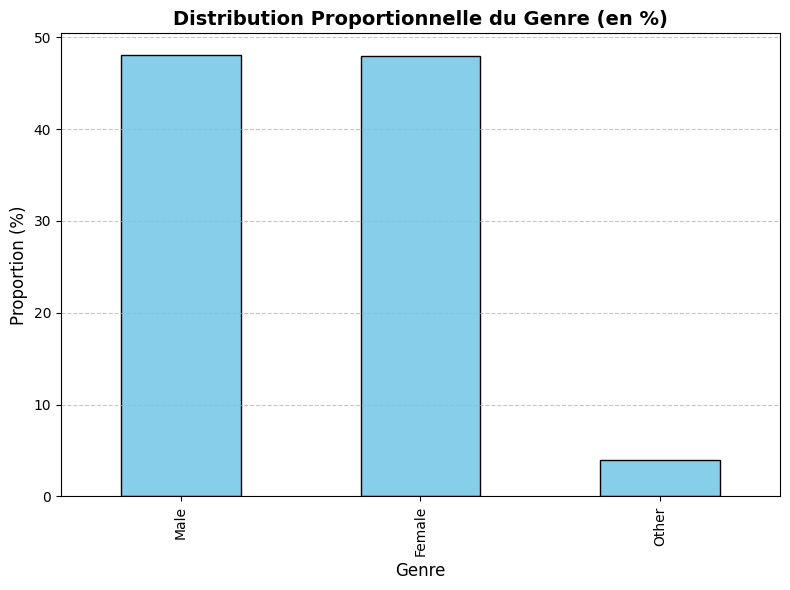

In [ ]:
# Calcul des proportions pour la distribution du genre
gender_counts = df['Gender'].value_counts(normalize=True) * 100  # En pourcentage

# Visualisation en proportion
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution Proportionnelle du Genre (en %)", fontsize=14, weight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()


<ipython-input-7-d2e1d0c5f9a9>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{education_counts.values[i]} ({education_proportions[i]:.1f}%)",  # Texte (nombre et proportion)


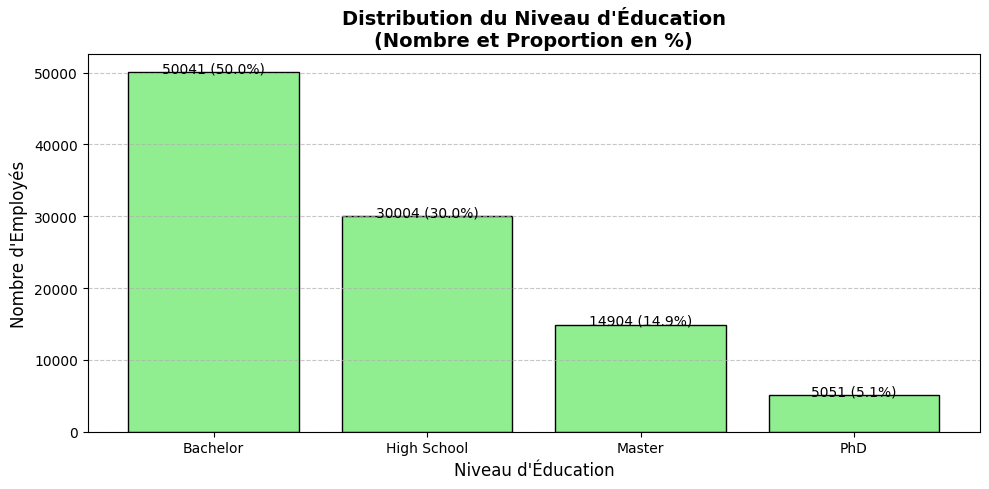

In [ ]:
# Visualisation


# Calcul des comptes et proportions pour le niveau d'éducation
education_counts = df['Education_Level'].value_counts()
education_proportions = education_counts / education_counts.sum() * 100

# Visualisation avec annotations au-dessus des barres
plt.figure(figsize=(10, 5))
ax = plt.bar(education_counts.index, education_counts.values, color='lightgreen', edgecolor='black')

# Annotation des valeurs au-dessus des barres
for i, bar in enumerate(ax):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position horizontale (centre de la barre)
        bar.get_height() + 1,  # Position verticale (au-dessus de la barre)
        f"{education_counts.values[i]} ({education_proportions[i]:.1f}%)",  # Texte (nombre et proportion)
        ha='center', fontsize=10
    )

# Titres et étiquettes
plt.title("Distribution du Niveau d'Éducation\n(Nombre et Proportion en %)", fontsize=14, weight='bold')
plt.xlabel("Niveau d'Éducation", fontsize=12)
plt.ylabel("Nombre d'Employés", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage du graphique
plt.show()



In [ ]:
# Etape 2 : Description bivariée

# Comptage par groupe avec agrégation sur Gender, Education_Level, et Performance_Category
contingency_table = df.groupby(['Gender', 'Education_Level', 'Performance_Category']).size().unstack(fill_value=0)

# Affichage de la table de contingence avec l'agrégation
print(contingency_table)



Performance_Category    Faible  Moyenne  Haute
Gender Education_Level                        
Female Bachelor           9671     4991   9476
       High School        5718     2877   5704
       Master             2853     1494   2780
       PhD                1008      441    988
Male   Bachelor           9741     4669   9492
       High School        5783     2871   5862
       Master             2768     1453   2974
       PhD                 975      450    993
Other  Bachelor            834      375    792
       High School         484      226    479
       Master              227      105    250
       PhD                  71       47     78


<ipython-input-8-2d1f65be5cef>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_table = df.groupby(['Gender', 'Education_Level', 'Performance_Category']).size().unstack(fill_value=0)


In [ ]:
# Calcul des proportions pour que chaque variable fasse 100%

contingency_table_proportions = contingency_table.div(contingency_table.sum(axis=1),axis=0)
print(contingency_table_proportions)

Performance_Category      Faible   Moyenne     Haute
Gender Education_Level                              
Female Bachelor         0.400655  0.206769  0.392576
       High School      0.399888  0.201203  0.398909
       Master           0.400309  0.209625  0.390066
       PhD              0.413623  0.180960  0.405416
Male   Bachelor         0.407539  0.195339  0.397122
       High School      0.398388  0.197782  0.403830
       Master           0.384712  0.201946  0.413343
       PhD              0.403226  0.186104  0.410670
Other  Bachelor         0.416792  0.187406  0.395802
       High School      0.407065  0.190076  0.402860
       Master           0.390034  0.180412  0.429553
       PhD              0.362245  0.239796  0.397959


In [ ]:
# Comptage par groupe avec agrégation sur Gender, Education_Level, Department, et Performance_Score
contingency_table = df.groupby([ 'Department', 'Performance_Category']).size().unstack(fill_value=0)

# Affichage de la table de contingence avec l'agrégation
print(contingency_table)


Performance_Category  Faible  Moyenne  Haute
Department                                  
Customer Support        4448     2227   4441
Engineering             4322     2220   4414
Finance                 4585     2171   4444
HR                      4389     2203   4368
IT                      4493     2176   4462
Legal                   4520     2183   4415
Marketing               4506     2320   4390
Operations              4423     2255   4503
Sales                   4447     2244   4431


<ipython-input-10-0ef1103acbd0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_table = df.groupby([ 'Department', 'Performance_Category']).size().unstack(fill_value=0)


In [ ]:
# Calcul des proportions pour que chaque département  fasse 100%

contingency_table_proportions = contingency_table.div(contingency_table.sum(axis=1),axis=0)
print(contingency_table_proportions)

Performance_Category    Faible   Moyenne     Haute
Department                                        
Customer Support      0.400144  0.200342  0.399514
Engineering           0.394487  0.202629  0.402884
Finance               0.409375  0.193839  0.396786
HR                    0.400456  0.201004  0.398540
IT                    0.403647  0.195490  0.400862
Legal                 0.406548  0.196348  0.397104
Marketing             0.401748  0.206847  0.391405
Operations            0.395582  0.201681  0.402737
Sales                 0.399838  0.201762  0.398400


In [ ]:
# Etape 3 :
# Test de khi deux entre le genre et la performance

from scipy.stats import chi2_contingency

# Créer la table de contingence
contingency_table = pd.crosstab(df['Performance_Category'], df['Gender'])

# Effectuer le test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrés de liberté: {dof}")
print("Tableau des valeurs attendues:")
print(expected)

# Interpréter les résultats
alpha = 0.05
print("\nInterprétation:")
if p < alpha:
    print("L'hypothèse nulle est rejetée. Il existe une association significative entre la catégorie de performance et le genre.")
else:
    print("L'hypothèse nulle n'est pas rejetée. Il n'y a pas d'association significative entre la catégorie de performance et le genre.")

Chi2: 13.092397515132099
P-value: 0.010833037385917654
Degrés de liberté: 4
Tableau des valeurs attendues:
[[19264.24133 19276.28123  1592.47744]
 [ 9599.71999  9605.71969   793.56032]
 [19137.03868 19148.99908  1581.96224]]

Interprétation:
L'hypothèse nulle est rejetée. Il existe une association significative entre la catégorie de performance et le genre.


In [ ]:
# Test de khi deux entre le genre et la performance

from scipy.stats import chi2_contingency

# Créer la table de contingence
contingency_table = pd.crosstab(df['Performance_Category'], df['Education_Level'])

# Effectuer le test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrés de liberté: {dof}")
print("Tableau des valeurs attendues:")
print(expected)

# Interpréter les résultats
alpha = 0.05
print("\nInterprétation:")
if p < alpha:
    print("L'hypothèse nulle est rejetée. Il existe une association significative entre la catégorie de performance et le niveau d'éducation.")
else:
    print("L'hypothèse nulle n'est pas rejetée. Il n'y a pas d'association significative entre la catégorie de performance et le niveau d'éducation.")

Chi2: 16.032246547981515
P-value: 0.013581930065144849
Degrés de liberté: 6
Tableau des valeurs attendues:
[[20082.95453 12041.50532  5981.42232  2027.11783]
 [10007.69959  6000.49996  2980.65096  1010.14949]
 [19950.34588 11961.99472  5941.92672  2013.73268]]

Interprétation:
L'hypothèse nulle est rejetée. Il existe une association significative entre la catégorie de performance et le niveau d'éducation.


In [ ]:
# Test de khi deux entre le département  et la performance

from scipy.stats import chi2_contingency

# Créer la table de contingence
contingency_table = pd.crosstab(df['Performance_Category'], df['Department'])

# Effectuer le test du chi2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrés de liberté: {dof}")
print("Tableau des valeurs attendues:")
print(expected)

# Interpréter les résultats
alpha = 0.05
print("\nInterprétation:")
if p < alpha:
    print("L'hypothèse nulle est rejetée. Il existe une association significative entre la catégorie de performance et le département.")
else:
    print("L'hypothèse nulle n'est pas rejetée. Il n'y a pas d'association significative entre la catégorie de performance et le département.")

Chi2: 15.19548435839698
P-value: 0.5103702287302805
Degrés de liberté: 16
Tableau des valeurs attendues:
[[4461.18428 4396.97148 4494.896   4398.5768  4467.20423 4461.98694
  4501.31728 4487.27073 4463.59226]
 [2223.08884 2191.09044 2239.888   2191.8904  2226.08869 2223.48882
  2243.08784 2236.08819 2224.28878]
 [4431.72688 4367.93808 4465.216   4369.5328  4437.70708 4432.52424
  4471.59488 4457.64108 4434.11896]]

Interprétation:
L'hypothèse nulle n'est pas rejetée. Il n'y a pas d'association significative entre la catégorie de performance et le département.



**Interpretation du test de khi-deux :**


*   **Si la p-value est inférieure au seuil de significativité (par exemple 0,05) :**
On rejette l'hypothèse nulle et on conclut qu'il existe une **association significative entre les deux variables qualitatives.**

*   **Si la p-value est supérieure au seuil :**
On ne peut pas rejeter l'hypothèse nulle, ce qui signifie qu'il n'y a **pas suffisamment de preuves pour conclure à une association entre les variables.**



In [ ]:
# Etape 4 : V Cramer afin de mésurer l'intensité de la rélation

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(var1, var2):
    # Créer la table de contingence
    contingency_table = pd.crosstab(var1, var2)

    # Effectuer le test du chi2
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calcul du Cramér's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))

    return cramer_v, chi2, p, dof, expected

def chi2_test_and_cramers_v(var1, var2):
    # Calculer Cramér's V et les résultats du chi-deux
    cramer_v, chi2, p, dof, expected = cramers_v(var1, var2)

    # Afficher les résultats
    print(f"\n🔹 Test de Cramér's V entre {var1.name} et {var2.name}")
    print(f"Chi2: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrés de liberté: {dof}")
    print("Tableau des valeurs attendues:")
    print(expected)
    print(f"Cramér's V: {cramer_v:.4f}")

    # Interpréter les résultats
    alpha = 0.05
    if p < alpha:
        print("❗ L'hypothèse nulle est rejetée → Il existe une association significative entre les deux variables.")
    else:
        print("✅ L'hypothèse nulle n'est pas rejetée → Pas d'association significative.")

# Appliquer le test pour chaque paire
chi2_test_and_cramers_v(df["Gender"], df["Performance_Category"])
chi2_test_and_cramers_v(df["Education_Level"], df["Performance_Category"])
chi2_test_and_cramers_v(df["Department"], df["Performance_Category"])



🔹 Test de Cramér's V entre Gender et Performance_Category
Chi2: 13.0924
P-value: 0.0108
Degrés de liberté: 4
Tableau des valeurs attendues:
[[19264.24133  9599.71999 19137.03868]
 [19276.28123  9605.71969 19148.99908]
 [ 1592.47744   793.56032  1581.96224]]
Cramér's V: 0.0081
❗ L'hypothèse nulle est rejetée → Il existe une association significative entre les deux variables.

🔹 Test de Cramér's V entre Education_Level et Performance_Category
Chi2: 16.0322
P-value: 0.0136
Degrés de liberté: 6
Tableau des valeurs attendues:
[[20082.95453 10007.69959 19950.34588]
 [12041.50532  6000.49996 11961.99472]
 [ 5981.42232  2980.65096  5941.92672]
 [ 2027.11783  1010.14949  2013.73268]]
Cramér's V: 0.0090
❗ L'hypothèse nulle est rejetée → Il existe une association significative entre les deux variables.

🔹 Test de Cramér's V entre Department et Performance_Category
Chi2: 15.1955
P-value: 0.5104
Degrés de liberté: 16
Tableau des valeurs attendues:
[[4461.18428 2223.08884 4431.72688]
 [4396.97148 2

# **Interpretation du V de Cramer**



*   Un **V de Cramer proche de 0** indique une **faible intensité** de la rélation
*   Un **V de Cramer proche de 1** indique une **relation forte**.

**Seuils d'interprétation Courants**:


*   **0 à 0,1** : Relation négligeable.
*   **0,1 à 0,3** : Relation faible.
* **0,3 à 0,5** : Relation modérée.
* **0,5 et plus** : Relation forte






In [ ]:
##################################################################################################################################################################################################
#                                               Analyse entre variable qualitative versus quanti                                                                                                 #
##################################################################################################################################################################################################

# Analyse de la Normalité des variables quantitatives




In [ ]:
# Etape 1 : Shapiro Wilk

from scipy.stats import shapiro

# Liste des variables quantitatives à tester
quantitative_vars = ['Monthly_Salary', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Performance_Score', 'Age']

# Test de normalité pour chaque variable
for var in quantitative_vars:
    stat, p = shapiro(df[var])
    print(f'Test de Shapiro-Wilk pour la variable {var}')
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # Interprétation du test
    alpha = 0.05
    if p > alpha:
        print(f'La distribution de la variable {var} est normale (on ne rejette pas H0)')
    else:
        print(f'La distribution de la variable {var} n\'est pas normale (on rejette H0)')
    print('---')




Test de Shapiro-Wilk pour la variable Monthly_Salary
Statistics=0.972, p=0.000
La distribution de la variable Monthly_Salary n'est pas normale (on rejette H0)
---
Test de Shapiro-Wilk pour la variable Work_Hours_Per_Week
Statistics=0.952, p=0.000
La distribution de la variable Work_Hours_Per_Week n'est pas normale (on rejette H0)
---
Test de Shapiro-Wilk pour la variable Overtime_Hours
Statistics=0.952, p=0.000
La distribution de la variable Overtime_Hours n'est pas normale (on rejette H0)
---
Test de Shapiro-Wilk pour la variable Performance_Score
Statistics=0.888, p=0.000
La distribution de la variable Performance_Score n'est pas normale (on rejette H0)
---
Test de Shapiro-Wilk pour la variable Age
Statistics=0.953, p=0.000
La distribution de la variable Age n'est pas normale (on rejette H0)
---


In [ ]:
# Visualisation de la Normalité

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Test de Shapiro-Wilk pour la variable Monthly_Salary
Statistics=0.972, p=0.000
La distribution de Monthly_Salary n'est pas normale (on rejette H0)
---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Test de Shapiro-Wilk pour la variable Work_Hours_Per_Week
Statistics=0.952, p=0.000
La distribution de Work_Hours_Per_Week n'est pas normale (on rejette H0)
---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Test de Shapiro-Wilk pour la variable Overtime_Hours
Statistics=0.952, p=0.000
La distribution de Overtime_Hours n'est pas normale (on rejette H0)
---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Test de Shapiro-Wilk pour la variable Performance_Score
Statistics=0.888, p=0.000
La distribution de Performance_Score n'est pas normale (on rejette H0)
---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


Test de Shapiro-Wilk pour la variable Age
Statistics=0.953, p=0.000
La distribution de Age n'est pas normale (on rejette H0)
---


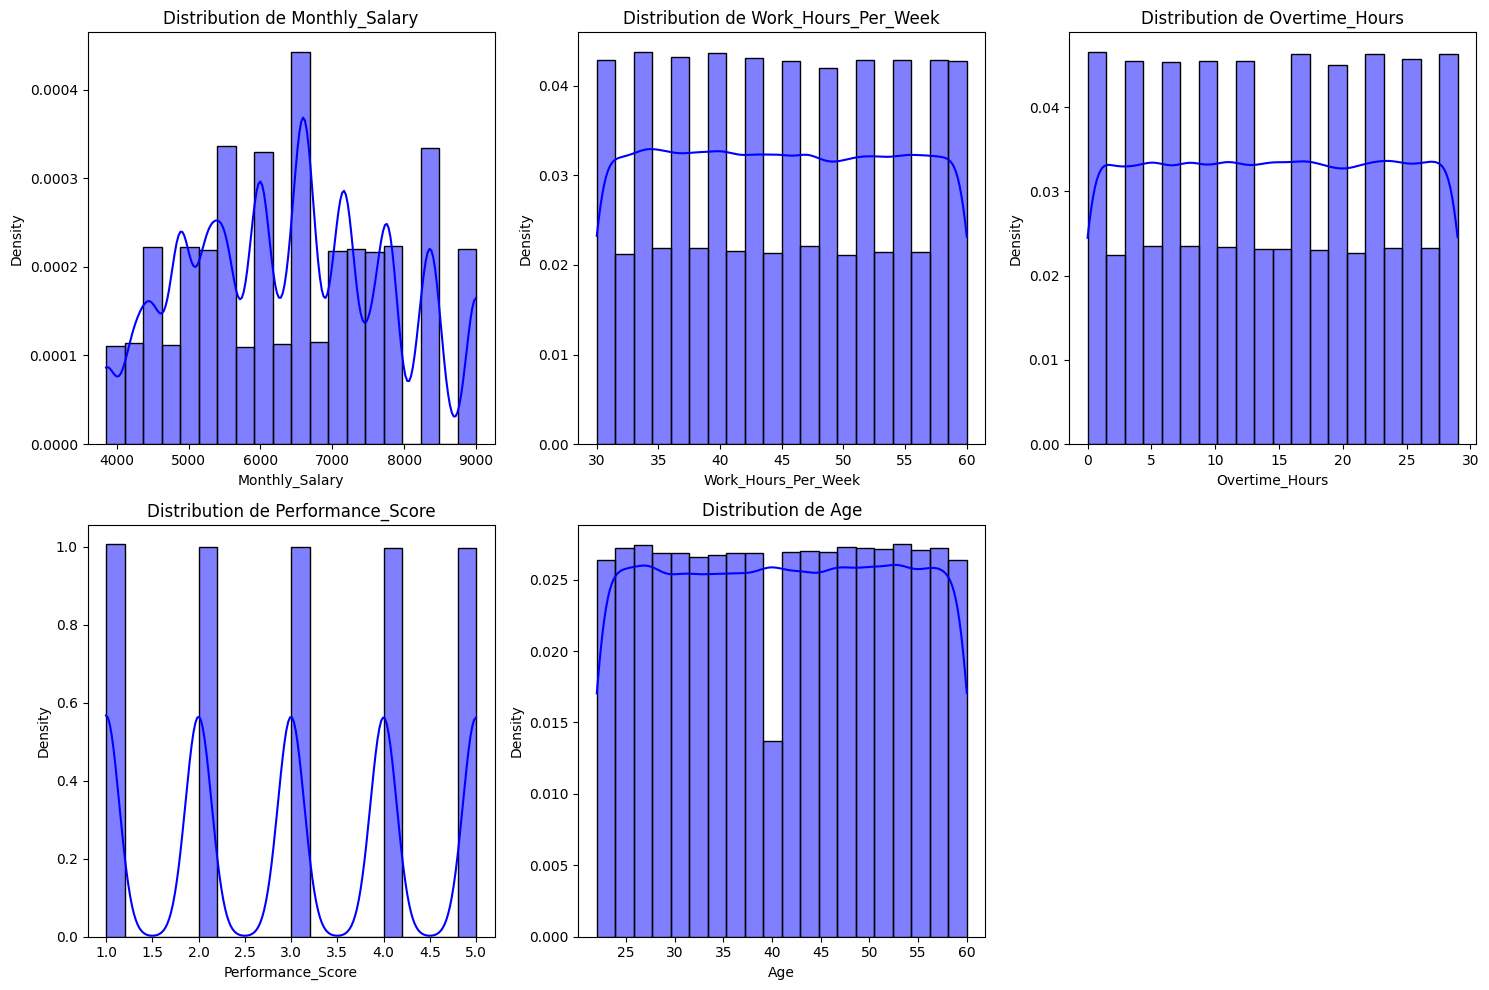

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Liste des variables quantitatives à tester
quantitative_vars = ['Monthly_Salary', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Performance_Score', 'Age']

# Créer une figure avec plusieurs sous-graphiques (une pour chaque variable)
plt.figure(figsize=(15, 10))

for i, var in enumerate(quantitative_vars, 1):
    plt.subplot(2, 3, i)  # Grille 2x3 pour les sous-graphiques
    sns.histplot(df[var], kde=True, bins=20, color='blue', stat='density')  # Histogramme + courbe de densité
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

    # Test de Shapiro-Wilk pour la normalité
    stat, p = shapiro(df[var])
    print(f'Test de Shapiro-Wilk pour la variable {var}')
    print(f'Statistics={stat:.3f}, p={p:.3f}')
    alpha = 0.05
    if p > alpha:
        print(f'La distribution de {var} est normale (on ne rejette pas H0)')
    else:
        print(f'La distribution de {var} n\'est pas normale (on rejette H0)')
    print('---')

plt.tight_layout()  # Ajuste l'espacement entre les sous-graphiques
plt.show()


# Tests non paramétriques lorsque les variables ne suivent pas une distribution normale

In [ ]:
# Etape 1 : Test de Man-Whitney

import pandas as pd
from scipy.stats import mannwhitneyu

# Assurez-vous que votre DataFrame df contient les colonnes appropriées.
# Par exemple : df['Gender'], df['Education_Level'], df['Department'], df['Performance_Score']

# Fonction pour effectuer le test de Mann-Whitney
def mann_whitney_test(group1, group2, variable_name):
    stat, p = mannwhitneyu(group1, group2)
    if p < 0.05:
        print(f"Il existe une différence significative entre les groupes pour {variable_name}.")
    else:
        print(f"Il n'y a pas de différence significative entre les groupes pour {variable_name}.")

# 1. Test de Mann-Whitney pour Genre (Male vs Female)
print("\nTest de Mann-Whitney pour Gender vs Performance_Score :")
male_performance = df[df['Gender'] == 'Male']['Performance_Score']
female_performance = df[df['Gender'] == 'Female']['Performance_Score']
mann_whitney_test(male_performance, female_performance, "Gender")

# 2. Test de Mann-Whitney pour Niveau d'Éducation (Bachelor vs Master)
print("\nTest de Mann-Whitney pour Education_Level vs Performance_Score :")
bachelor_performance = df[df['Education_Level'] == 'Bachelor']['Performance_Score']
master_performance = df[df['Education_Level'] == 'Master']['Performance_Score']
mann_whitney_test(bachelor_performance, master_performance, "Education_Level")

# 3. Test de Mann-Whitney pour Département (Sales vs Marketing)
print("\nTest de Mann-Whitney pour Department vs Performance_Score :")
sales_performance = df[df['Department'] == 'Sales']['Performance_Score']
marketing_performance = df[df['Department'] == 'Marketing']['Performance_Score']
mann_whitney_test(sales_performance, marketing_performance, "Department")

# Vous pouvez ajouter d'autres tests de Mann-Whitney pour d'autres variables qualitatives, selon votre dataset.



Test de Mann-Whitney pour Gender vs Performance_Score :
Il n'y a pas de différence significative entre les groupes pour Gender.

Test de Mann-Whitney pour Education_Level vs Performance_Score :
Il existe une différence significative entre les groupes pour Education_Level.

Test de Mann-Whitney pour Department vs Performance_Score :
Il n'y a pas de différence significative entre les groupes pour Department.


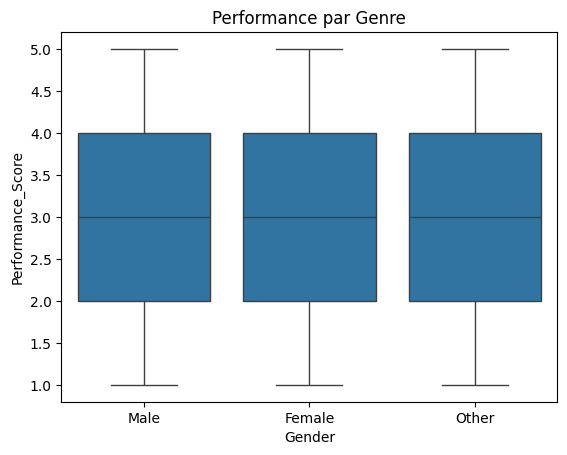

In [ ]:
# Visualisation

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Gender', y='Performance_Score', data=df)
plt.title("Performance par Genre")
plt.show()


# Interpretation du test de Man-Whitney

* Si la **p-value est inférieure à 0.05**, cela signifie qu'il y a **une différence significative entre les groupes** (par exemple, un impact significatif de l'éducation ou du genre sur la performance).
* Si la **p-value est supérieure à 0.05**, cela signifie qu'il n'y a **pas de différence significative entre les groupes pour la variable testée**.

# Analyse de la corrélation entre les variables quantitatives

Les tests de corrélation permettent de mesurer le degré d'association entre deux variables quantitatives. Ils répondent à la question : Les variations d'une variable sont-elles associées à celles d'une autre ?  

Types de Tests 🇰

1. **Coorélation de Pearson**


*   Mesure une **association linéaire** entre deux (2) variables.
*   Utilisée pour des rélations strictement **linéaires**

2. **Corrélationn de Spearman**

3. **Corrélation de Kendall**


#Quesion métier

Le salaire mensuel et le score de performance sont-ils corrélés ?

In [ ]:
# Etape 1 : Analyses descriptives univariées


In [ ]:
# Description univariée
print(df["Monthly_Salary"].describe())
print(df["Performance_Score"].describe())
print(df["Employee_Satisfaction_Score"].describe())

count    100000.000000
mean       6403.211000
std        1372.508717
min        3850.000000
25%        5250.000000
50%        6500.000000
75%        7500.000000
max        9000.000000
Name: Monthly_Salary, dtype: float64
count    100000.000000
mean          2.995430
std           1.414726
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Performance_Score, dtype: float64
count    100000.000000
mean          2.999088
std           1.150719
min           1.000000
25%           2.010000
50%           3.000000
75%           3.990000
max           5.000000
Name: Employee_Satisfaction_Score, dtype: float64


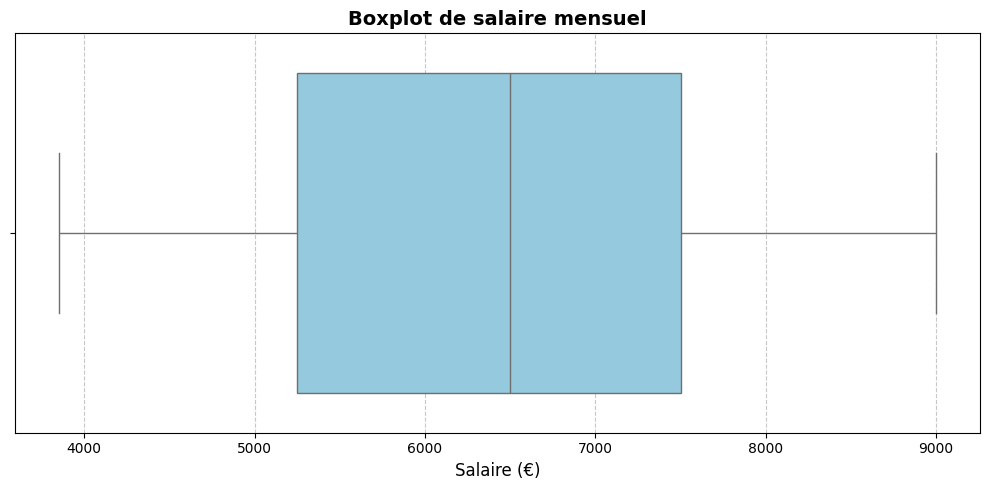

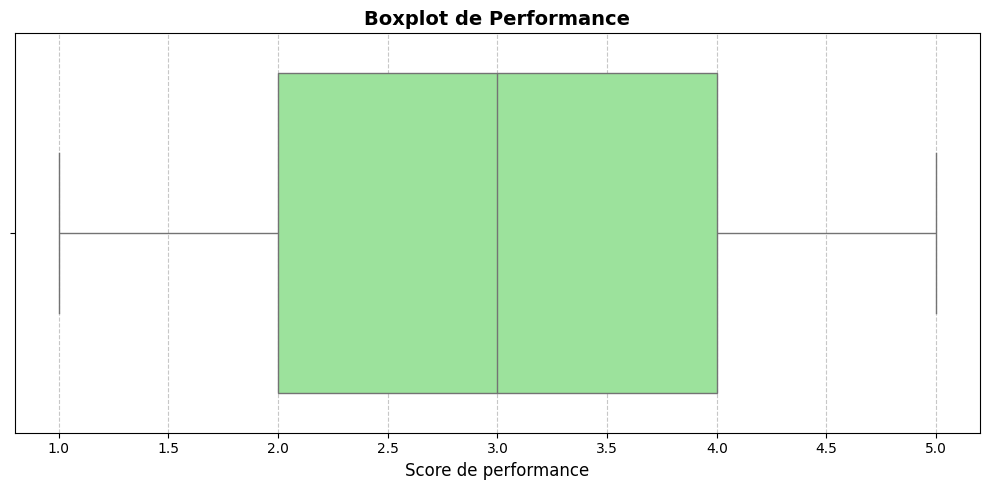

In [ ]:
# Création de boxplots  pour les variables "Salaire" et "Performance"
plt.figure(figsize=(10, 5))
sns.boxplot(data=df['Monthly_Salary'], orient='h', color='skyblue')
plt.title("Boxplot de salaire mensuel", fontsize=14, weight='bold')
plt.xlabel("Salaire (€)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df['Performance_Score'], orient='h', color='lightgreen')
plt.title("Boxplot de Performance", fontsize=14, weight='bold')
plt.xlabel("Score de performance", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

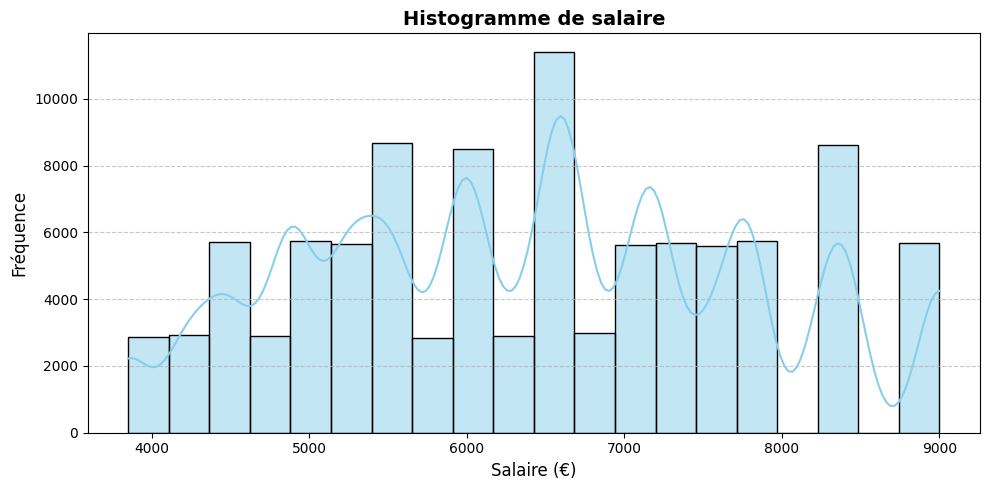

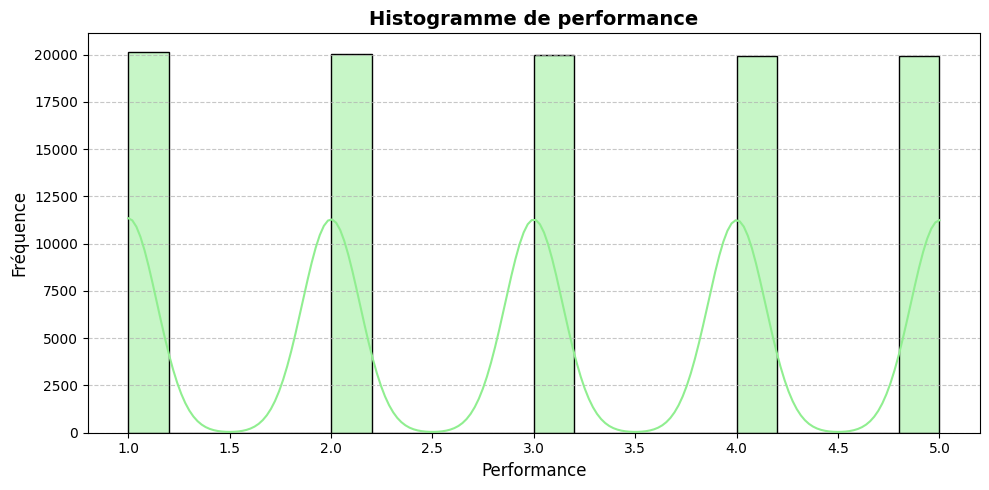

In [ ]:
# Création d'histogrammes pour les variables "Revenu" et "Dépenses Publicitaires"
plt.figure(figsize=(10, 5))
sns.histplot(df['Monthly_Salary'], kde=True, color='skyblue', bins=20)
plt.title("Histogramme de salaire", fontsize=14, weight='bold')
plt.xlabel("Salaire (€)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Performance_Score'], kde=True, color='lightgreen', bins=20)
plt.title("Histogramme de performance", fontsize=14, weight='bold')
plt.xlabel("Performance", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

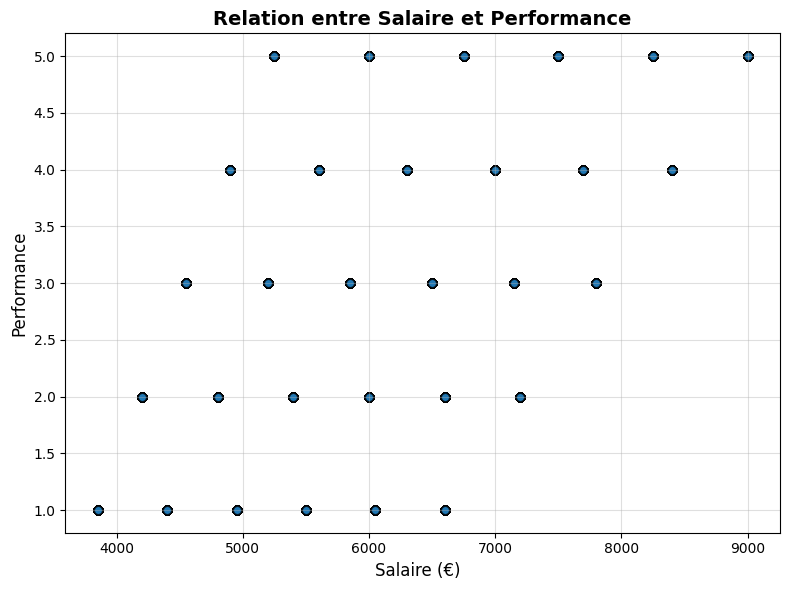

In [ ]:
# Etape 2: Scatter plot pour visualiser la relation
plt.figure(figsize=(8, 6))
plt.scatter(df['Monthly_Salary'], df['Performance_Score'], alpha=0.7, edgecolors='k')
plt.title("Relation entre Salaire et Performance", fontsize=14, weight='bold')
plt.xlabel("Salaire (€)  ", fontsize=12)
plt.ylabel("Performance", fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

plt.show()

In [ ]:
# Import necessary functions from scipy.stats
from scipy.stats import pearsonr, spearmanr, kendalltau

# Etape 3 : Corrélation

pearson_corr, _ = pearsonr(df['Monthly_Salary'], df['Performance_Score'])
spearman_corr, _ = spearmanr(df['Monthly_Salary'], df['Performance_Score'])
kendall_corr, _ = kendalltau(df['Monthly_Salary'], df['Performance_Score'])

print(f"Corrélation Pearson: {pearson_corr}")
print(f"Corrélation Spearman: {spearman_corr}")
print(f"Corrélation Kendall: {kendall_corr}")

Corrélation Pearson: 0.5100348075988801
Corrélation Spearman: 0.477761298901028
Corrélation Kendall: 0.3614084738828331


In [ ]:
# Etape 4: Pvaleur:
# Importation des packages
from scipy.stats import pearsonr, spearmanr, kendalltau

# Calcul
# Changed 'data' to 'df' and column names to match your DataFrame
pearson_corr, pval_pearson = pearsonr(df['Monthly_Salary'], df['Performance_Score'])
spearman_corr, pval_spearman = spearmanr(df['Monthly_Salary'], df['Performance_Score'])
kendall_corr, pval_kendall = kendalltau(df['Monthly_Salary'], df['Performance_Score'])

# Affichage des résultats
corr_results = {
    "Méthode": ["Pearson", "Spearman", "Kendall"],
    "Corrélation": [pearson_corr, spearman_corr, kendall_corr],
    "P-valeur": [pval_pearson, pval_spearman, pval_kendall]
}

corr_results

{'Méthode': ['Pearson', 'Spearman', 'Kendall'],
 'Corrélation': [0.5100348075988801, 0.477761298901028, 0.3614084738828331],
 'P-valeur': [0.0, 0.0, 0.0]}

** Les tests statistiques **
1. Tests pour les rélations qualitatives(quali-quali)


2.Tests pour comparer les moyennes(quali-quanti)


**3. Tests de variances (homogéneité des variances **)


**4.Tests de normalité **

# Question metier :

 Comment les heures de formation, les heures supplémentaires, le nombre de projets gérés et le score de performance interagissent-ils pour optimiser la productivité ?

In [ ]:
# Etape 1 : Regression multiple

import pandas as pd
import statsmodels.api as sm


df = pd.DataFrame(df)

# Variables indépendantes
X = df[['Training_Hours', 'Overtime_Hours', 'Projects_Handled', 'Age', 'Years_At_Company', 'Promotions']] # Replace with actual column names from df.columns
X = sm.add_constant(X)  # Ajouter une constante pour l'intercept du modèle
# Variable dépendante
y = df['Performance_Score']

# Modèle de régression linéaire
model = sm.OLS(y, X).fit()

# Résumé du modèle
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4169
Date:                Mon, 03 Feb 2025   Prob (F-statistic):              0.868
Time:                        14:46:49   Log-Likelihood:            -1.7659e+05
No. Observations:              100000   AIC:                         3.532e+05
Df Residuals:                   99993   BIC:                         3.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9858      0.023  